In [1]:
import pandas as pd
import sqlite3
from google.colab import files

In [ ]:
# --- 1. Baca CSV ---
df_transactions = pd.read_csv("transactions_data.csv")
df_users = pd.read_csv("users_data.csv")
df_cards = pd.read_csv("cards_data.csv")

# --- 2. Cleaning kolom numerik yang ada tanda $ ---
df_transactions['amount'] = df_transactions['amount'].replace(r'[\$,]', '', regex=True).astype(float)
df_users['per_capita_income'] = df_users['per_capita_income'].replace(r'[\$,]', '', regex=True).astype(float)
df_users['yearly_income'] = df_users['yearly_income'].replace(r'[\$,]', '', regex=True).astype(float)
df_users['total_debt'] = df_users['total_debt'].replace(r'[\$,]', '', regex=True).astype(float)
df_cards['credit_limit'] = df_cards['credit_limit'].replace(r'[\$,]', '', regex=True).astype(float)

# --- 3. Ubah kolom tanggal jadi datetime ---
df_transactions['date'] = pd.to_datetime(df_transactions['date'])
df_cards['expires'] = pd.to_datetime(df_cards['expires'], format='%m/%Y', errors='coerce')
df_cards['acct_open_date'] = pd.to_datetime(df_cards['acct_open_date'], format='%m/%Y', errors='coerce')

In [2]:
# --- 4. Buat database SQLite ---
conn = sqlite3.connect("userbehavior.db")

# --- 5. Simpan tabel ke SQLite ---
df_transactions.to_sql("transactions_data", conn, if_exists="replace", index=False)
df_users.to_sql("users_data", conn, if_exists="replace", index=False)
df_cards.to_sql("cards_data", conn, if_exists="replace", index=False)

# --- 6. Tutup koneksi dan download ---
files.download("userbehavior.db")

In [3]:
#--List 10 baris pertama dari tabel transactions
query = """
SELECT * FROM transactions_data LIMIT 10;
"""
pd.read_sql_query(query, conn)

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,None
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,None
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,None
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,None
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,None
5,7475333,2010-01-01 00:07:00,1807,165,4.81,Swipe Transaction,20519,Bronx,NY,10464.0,5942,None
6,7475334,2010-01-01 00:09:00,1556,2972,77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,None
7,7475335,2010-01-01 00:14:00,1684,2140,26.46,Online Transaction,39021,ONLINE,None,NaN,4784,None
8,7475336,2010-01-01 00:21:00,335,5131,261.58,Online Transaction,50292,ONLINE,None,NaN,7801,None
9,7475337,2010-01-01 00:21:00,351,1112,10.74,Swipe Transaction,3864,Flushing,NY,11355.0,5813,None


In [4]:
#--List 10 baris pertama dari tabel users
query = """
SELECT * FROM users_data LIMIT 10;
"""
pd.read_sql_query(query, conn)

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278.0,59696.0,127613.0,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891.0,77254.0,191349.0,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681.0,33483.0,196.0,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145.0,249925.0,202328.0,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797.0,109687.0,183855.0,675,1
5,68,42,70,1977,10,Male,58 Birch Lane,41.55,-90.60,20599.0,41997.0,0.0,704,3
6,1075,36,67,1983,12,Female,5695 Fifth Street,38.22,-85.74,25258.0,51500.0,102286.0,672,3
7,1711,26,67,1993,12,Male,1941 Ninth Street,45.51,-122.64,26790.0,54623.0,114711.0,728,1
8,1116,81,66,1938,7,Female,11 Spruce Avenue,40.32,-75.32,26273.0,42509.0,2895.0,755,5
9,1752,34,60,1986,1,Female,887 Grant Street,29.97,-92.12,18730.0,38190.0,81262.0,810,1


In [5]:
#--List 10 baris pertama dari tabel cards
query = """
SELECT * FROM cards_data LIMIT 10;
"""
pd.read_sql_query(query, conn)

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,2022-12-01 00:00:00,623,YES,2,24295.0,2002-09-01 00:00:00,2008,No
1,2731,825,Visa,Debit,4956965974959986,2020-12-01 00:00:00,393,YES,2,21968.0,2014-04-01 00:00:00,2014,No
2,3701,825,Visa,Debit,4582313478255491,2024-02-01 00:00:00,719,YES,2,46414.0,2003-07-01 00:00:00,2004,No
3,42,825,Visa,Credit,4879494103069057,2024-08-01 00:00:00,693,NO,1,12400.0,2003-01-01 00:00:00,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,2009-03-01 00:00:00,75,YES,1,28.0,2008-09-01 00:00:00,2009,No
5,4537,1746,Visa,Credit,4404898874682993,2003-09-01 00:00:00,736,YES,1,27500.0,2003-09-01 00:00:00,2012,No
6,1278,1746,Visa,Debit,4001482973848631,2022-07-01 00:00:00,972,YES,2,28508.0,2011-02-01 00:00:00,2011,No
7,3687,1746,Mastercard,Debit,5627220683410948,2022-06-01 00:00:00,48,YES,2,9022.0,2003-07-01 00:00:00,2015,No
8,3465,1746,Mastercard,Debit (Prepaid),5711382187309326,2020-11-01 00:00:00,722,YES,2,54.0,2010-06-01 00:00:00,2015,No
9,3754,1746,Mastercard,Debit (Prepaid),5766121508358701,2023-02-01 00:00:00,908,YES,1,99.0,2006-07-01 00:00:00,2012,No


In [6]:
#-- Top 10 transactions by Month and Year
query1 = """
SELECT
  strftime('%Y-%m', date) AS month,
  COUNT(*) AS total_transactions
FROM
  transactions_data
GROUP BY
  month
ORDER BY
  month DESC
LIMIT 10;
"""
pd.read_sql(query1, conn)

,month,total_transactions
0,2019-10,117374
1,2019-09,114771
2,2019-08,118905
3,2019-07,118906
4,2019-06,115014
5,2019-05,117913
6,2019-04,114034
7,2019-03,118548
8,2019-02,106385
9,2019-01,118116


In [8]:
#-- Top 10 users by Total Amount
query2 = """
SELECT
  client_id,
  COUNT(*) AS total_transaksi,
  SUM(amount) AS total_amount
FROM
  transactions_data
GROUP BY
  client_id
ORDER BY
  total_amount DESC
LIMIT 10;
"""
pd.read_sql(query2, conn)

,client_id,total_transaksi,total_amount
0,96,38617,2445773.25
1,1686,19810,2167880.90
2,1340,22023,2039921.23
3,840,15095,1956340.84
4,464,27619,1882901.35
5,490,21831,1711482.69
6,704,20748,1635022.05
7,285,32032,1615458.99
8,488,23990,1611114.42
9,1168,30520,1590822.75


In [9]:
#-- Crad of Type by avg limit
query3 = """
SELECT
  card_type,
  AVG(credit_limit) AS avg_credit_limit
FROM
  cards_data
GROUP BY
  card_type;
"""
df_card_type = pd.read_sql(query3, conn)
display(df_card_type)

,card_type,avg_credit_limit
0,Credit,11174.380165
1,Debit,18557.888636
2,Debit (Prepaid),64.448097


In [10]:
#-- Average Income of Users by Gender
query4 = """
SELECT
  gender,
  AVG(yearly_income) AS avg_income,
  COUNT(*) AS total_users
FROM
  users_data
GROUP BY
  gender;
"""
pd.read_sql(query4, conn)

,gender,avg_income,total_users
0,Female,46048.314961,1016
1,Male,45372.638211,984


In [11]:
#-- Brand of Cards
query5 = """
SELECT
  card_brand,
  COUNT(*) AS total_cards
FROM
  cards_data
GROUP BY
  card_brand
ORDER BY
  total_cards DESC;
"""
pd.read_sql(query5, conn)

,card_brand,total_cards
0,Mastercard,3209
1,Visa,2326
2,Amex,402
3,Discover,209


In [12]:
#-- Error of Transactions
query6 = """
SELECT
    errors AS jenis_error,
    use_chip AS jenis_transaksi,
    merchant_city,
    COUNT(id) AS jumlah_kasus
FROM
    transactions_data
WHERE
    jenis_error IS NOT NULL AND jenis_error != 'None'
GROUP BY
    jenis_error,
    jenis_transaksi,
    merchant_city
ORDER BY
    jumlah_kasus DESC
LIMIT 10;
"""
pd.read_sql_query(query6, conn)

,jenis_error,jenis_transaksi,merchant_city,jumlah_kasus
0,Insufficient Balance,Online Transaction,ONLINE,12160
1,Bad Card Number,Online Transaction,ONLINE,7766
2,Bad Expiration,Online Transaction,ONLINE,6161
3,Bad CVV,Online Transaction,ONLINE,6103
4,Technical Glitch,Online Transaction,ONLINE,3024
5,Insufficient Balance,Swipe Transaction,Riverside,1344
6,Insufficient Balance,Chip Transaction,Riverside,1275
7,Insufficient Balance,Swipe Transaction,Houston,857
8,Insufficient Balance,Swipe Transaction,Orlando,787
9,Insufficient Balance,Chip Transaction,Farmington,670


In [13]:
#-- Segmentation of Users
query7 = """
SELECT
    CASE
        WHEN u.yearly_income < 50000 THEN 'Pendapatan Rendah'
        WHEN u.yearly_income BETWEEN 50000 AND 100000 THEN 'Pendapatan Menengah'
        ELSE 'Pendapatan Tinggi'
    END AS segmen_pendapatan,

    CASE
        WHEN u.credit_score < 650 THEN 'Resiko Tinggi'
        WHEN u.credit_score BETWEEN 650 AND 750 THEN 'Resiko Sedang'
        ELSE 'Resiko Rendah'
    END AS segmen_risiko,

    COUNT(u.id) AS jumlah_pelanggan,
    AVG(c.credit_limit) AS rata_rata_limit_kredit,
    AVG(u.total_debt) AS rata_rata_total_utang
FROM
    users_data AS u
JOIN
    cards_data AS c
ON
    u.id = c.client_id
GROUP BY
    segmen_pendapatan,
    segmen_risiko
ORDER BY
    segmen_pendapatan,
    segmen_risiko;
"""
pd.read_sql_query(query7, conn)

,segmen_pendapatan,segmen_risiko,jumlah_pelanggan,rata_rata_limit_kredit,rata_rata_total_utang
0,Pendapatan Menengah,Resiko Rendah,474,19604.531646,76417.166667
1,Pendapatan Menengah,Resiko Sedang,987,20131.701114,80740.825735
2,Pendapatan Menengah,Resiko Tinggi,188,16204.367021,103166.558511
3,Pendapatan Rendah,Resiko Rendah,1277,11590.528583,42878.920908
4,Pendapatan Rendah,Resiko Sedang,2532,11523.874803,45113.201027
5,Pendapatan Rendah,Resiko Tinggi,534,10400.906367,52448.061798
6,Pendapatan Tinggi,Resiko Rendah,44,41763.659091,75399.977273
7,Pendapatan Tinggi,Resiko Sedang,90,43687.033333,152655.922222
8,Pendapatan Tinggi,Resiko Tinggi,20,33383.300000,246465.450000


In [14]:
#-- Top 10 Merchant Category by Total Amount
query8 = """
SELECT
    mcc,
    COUNT(id) AS jumlah_transaksi,
    SUM(amount) AS total_nilai_transaksi
FROM
    transactions_data
GROUP BY
    mcc
ORDER BY
    total_nilai_transaksi DESC
LIMIT 10;
"""
pd.read_sql_query(query8, conn)

,mcc,jumlah_transaksi,total_nilai_transaksi
0,4829,589140,5.315852e+07
1,5411,1592584,4.097075e+07
2,5300,601942,3.769755e+07
3,5912,772913,3.511353e+07
4,5541,1424711,2.957043e+07
5,4900,242993,2.765004e+07
6,5311,475384,2.703197e+07
7,5812,999738,2.634823e+07
8,7538,478263,2.495564e+07
9,4814,218243,2.472647e+07


In [15]:
#-- Distribution Age of Users
query9 = """
SELECT
    CASE
        WHEN current_age < 30 THEN '<30'
        WHEN current_age BETWEEN 30 AND 50 THEN '30-50'
        WHEN current_age BETWEEN 51 AND 70 THEN '51-70'
        ELSE '70+'
    END AS age_group,
    COUNT(*) AS total_users
FROM
  users_data
GROUP BY
  age_group;
"""
pd.read_sql_query(query9, conn)

,age_group,total_users
0,30-50,765
1,51-70,552
2,70+,203
3,<30,480


In [16]:
#-- Rush Hour of Transactions
query10 = """
SELECT
    strftime('%H', date) AS jam_transaksi,
    COUNT(id) AS jumlah_transaksi
FROM
    transactions_data
GROUP BY
    jam_transaksi
ORDER BY
    jumlah_transaksi DESC;
"""
pd.read_sql_query(query10, conn)

,jam_transaksi,jumlah_transaksi
0,12,953498
1,11,943671
2,07,901756
3,13,900703
4,14,887776
5,08,880501
6,09,876423
7,10,871512
8,16,864678
9,15,858022


**MACHINE LEARNING**

In [17]:
# --- Machine Leraning
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Siapkan Data Untuk Model
# Ambil data finansial yang relevan untuk segmentasi
query_ml_data = """
SELECT
    u.id,
    u.current_age,
    u.yearly_income,
    u.total_debt,
    u.credit_score,
    u.num_credit_cards,
    AVG(c.credit_limit) as avg_credit_limit   -- Rata-rata limit kredit jika satu user punya banyak kartu
FROM
    users_data AS u
JOIN
    cards_data AS c
ON
    u.id = c.client_id
GROUP BY
    u.id;
"""
df_for_ml = pd.read_sql_query(query_ml_data, conn)
print("Data yang digunakan untuk Machine Learning:")
print(df_for_ml.head())

Data yang digunakan untuk Machine Learning:
   id  current_age  yearly_income  total_debt  credit_score  num_credit_cards  \
0   0           33        59613.0     36199.0           763                 4   
1   1           43        45360.0     14587.0           704                 3   
2   2           48        27447.0     80850.0           673                 5   
3   3           49        27943.0     18693.0           681                 4   
4   4           54        76431.0    115362.0           716                 5   

   avg_credit_limit  
0           26414.0  
1           13935.0  
2           10072.2  
3            3430.5  
4           27240.4  


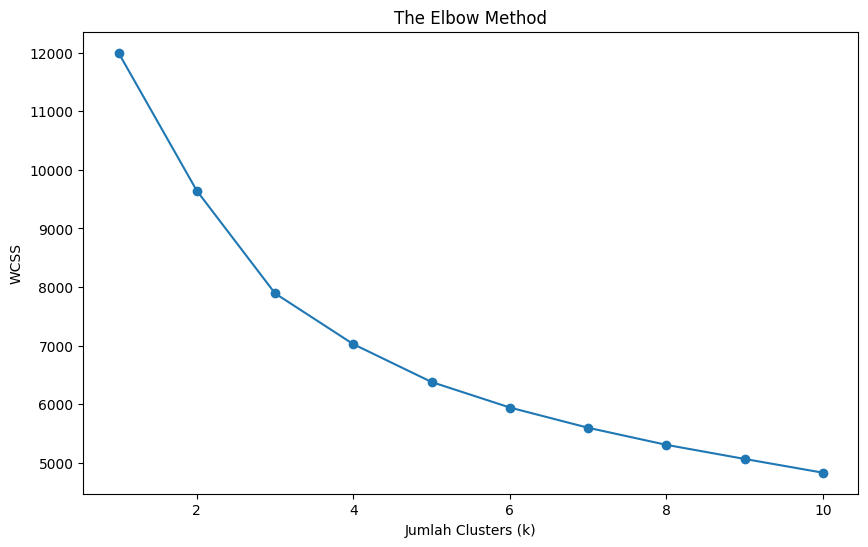

In [18]:
# Pilih dan Standarkan Fitur-fitur yang akan digunakan untuk model
fitur = ['yearly_income', 'total_debt', 'credit_score', 'avg_credit_limit', 'num_credit_cards', 'current_age']
X = df_for_ml[fitur]

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Mencari Jumlah Cluster Terbauk Menggunakan Elbow Method (1-10 Cluster)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Gambar grafiknya
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Jumlah Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [30]:
print("Dari grafik di atas, sikunya terlihat di sekitar k=3 atau k=4. Akan dipilih 4 cluster.")


# Train Model dengan 4 Clusters
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Tambahkan hasil pengelompokan (label cluster) ke data awal kita
df_for_ml['cluster'] = kmeans.labels_


# Analisis Hasil
cluster_analysis = df_for_ml.groupby('cluster')[fitur].mean().reset_index()
print("\nAnalisis Rata-rata Fitur per Cluster:")
display(cluster_analysis)

# Anggota per cluster
print("\nJumlah Anggota per Cluster:")
display(df_for_ml['cluster'].value_counts().sort_index())

Dari grafik di atas, sikunya terlihat di sekitar k=3 atau k=4. Akan dipilih 4 cluster.

Analisis Rata-rata Fitur per Cluster:


,cluster,yearly_income,total_debt,credit_score,avg_credit_limit,num_credit_cards,current_age
0,0,41299.413366,71322.462871,621.490099,9752.370421,1.915842,44.742574
1,1,89872.030612,146768.500000,715.301020,29863.723482,2.831633,40.448980
2,2,38874.060656,34472.385246,729.508197,13081.180477,4.685246,63.572131
3,3,42302.159494,61785.230380,738.212658,12473.538987,2.479747,32.911392



Jumlah Anggota per Cluster:


,count
cluster,
0,404
1,196
2,610
3,790


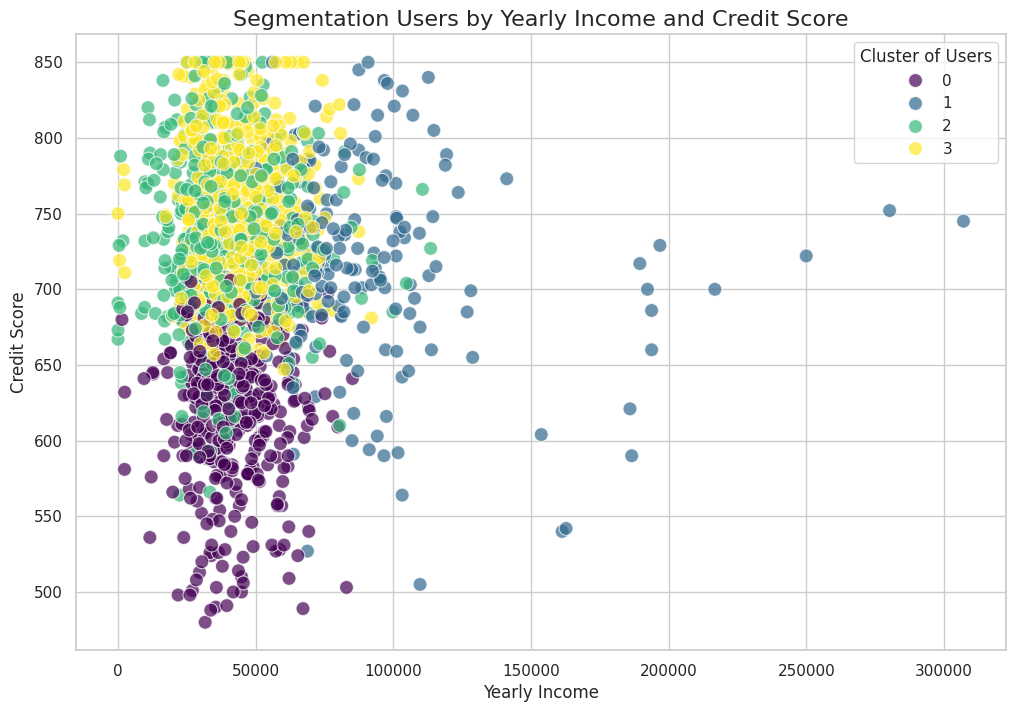

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid") #--Untuk style visualisasi agar lebih menarik

# Buat Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='yearly_income',
    y='credit_score',
    hue='cluster',
    palette='viridis',
    data=df_for_ml,
    s=100,
    alpha=0.7

# Menambahkan judul dan label
plt.title('Segmentation Users by Yearly Income and Credit Score', fontsize=16)
plt.xlabel('Yearly Income', fontsize=12)
plt.ylabel('Credit Score', fontsize=12)
plt.legend(title='Cluster of Users')
plt.show()

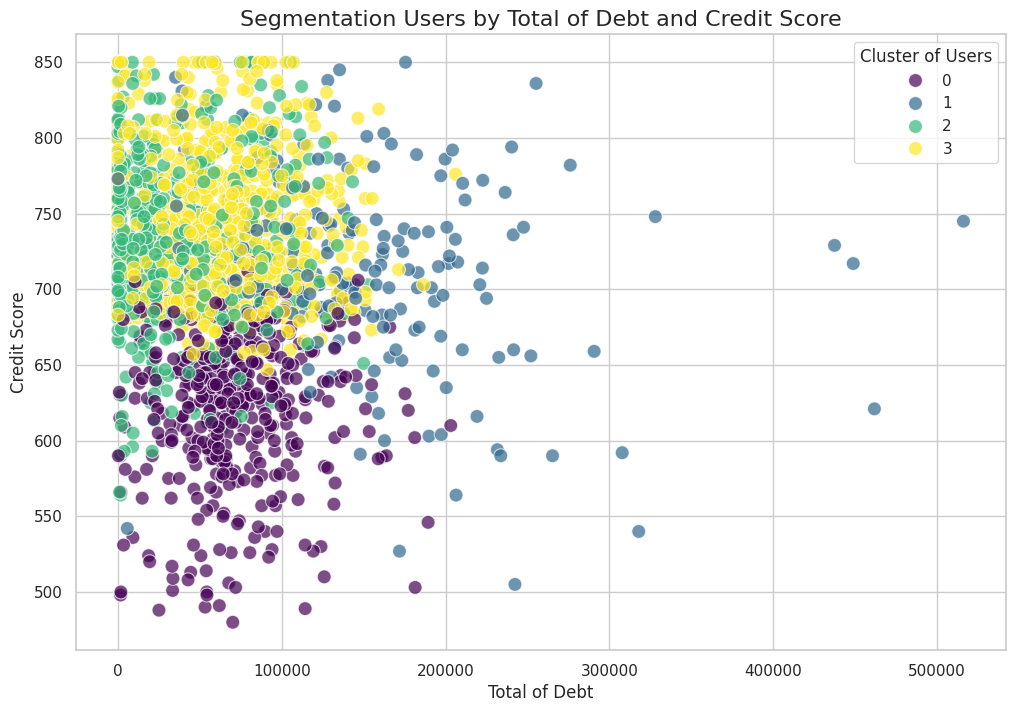

In [28]:
# Buat Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='total_debt',
    y='credit_score',
    hue='cluster',
    palette='viridis',
    data=df_for_ml,
    s=100,
    alpha=0.7
)

# Menambahkan judul dan label
plt.title('Segmentation Users by Total of Debt and Credit Score', fontsize=16)
plt.xlabel('Total of Debt', fontsize=12)
plt.ylabel('Credit Score', fontsize=12)
plt.legend(title='Cluster of Users')
plt.show()

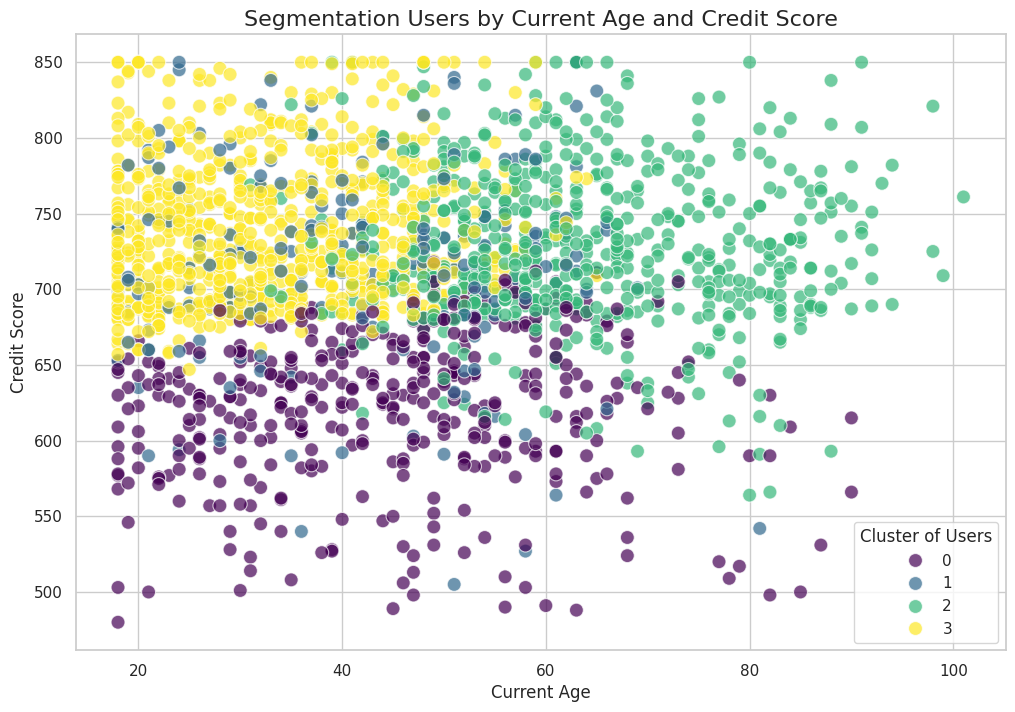

In [26]:
# Buat Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='current_age',
    y='credit_score',
    hue='cluster',
    palette='viridis',
    data=df_for_ml,
    s=100,
    alpha=0.7
)

# Menambahkan judul dan label
plt.title('Segmentation Users by Current Age and Credit Score', fontsize=16)
plt.xlabel('Current Age', fontsize=12)
plt.ylabel('Credit Score', fontsize=12)
plt.legend(title='Cluster of Users')
plt.show()

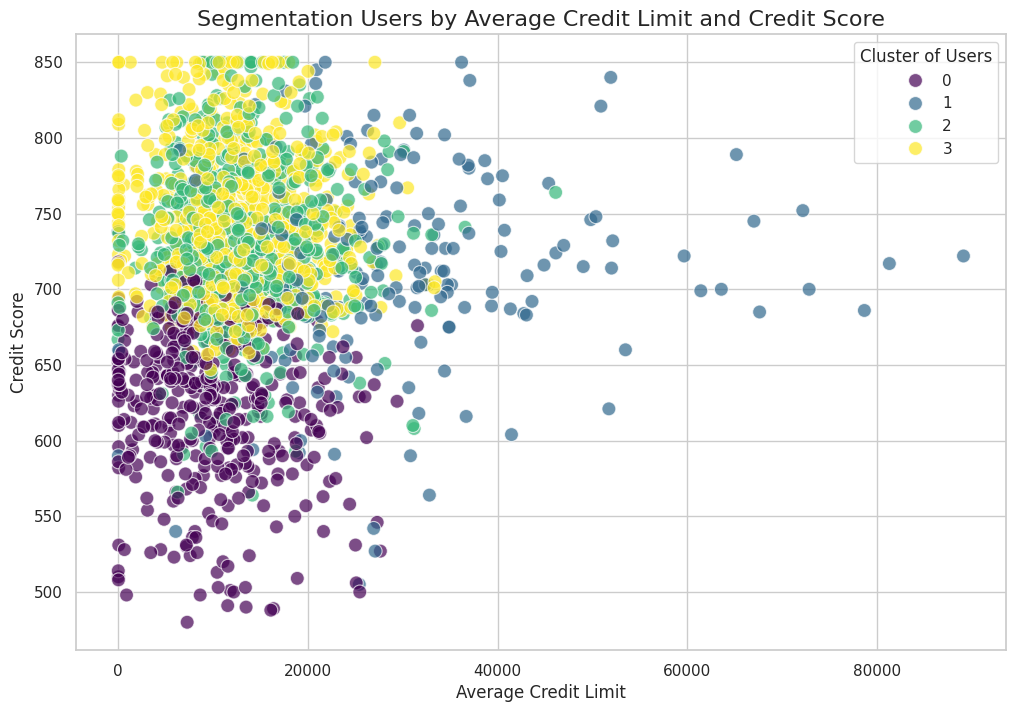

In [27]:
# Buat Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='avg_credit_limit',
    y='credit_score',
    hue='cluster',
    palette='viridis',
    data=df_for_ml,
    s=100,
    alpha=0.7
)

# Menambahkan judul dan label
plt.title('Segmentation Users by Average Credit Limit and Credit Score', fontsize=16)
plt.xlabel('Average Credit Limit', fontsize=12)
plt.ylabel('Credit Score', fontsize=12)
plt.legend(title='Cluster of Users')
plt.show()